## Experimenting with the SIFT Feature Detector and Descriptor

SIFT approximates the LoG Filter that is convolved over the image for different sigma values with a Difference of Gaussian (DoG)

In [28]:
import numpy as np
import cv2 as cv
img = cv.imread('./../Feature_rich_image.jpg')
img_copy = img.copy()
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()


In [22]:
sift.setContrastThreshold(0.1) # The threshold to keep only prominent features and remove non-desirable features like edges
sift.setEdgeThreshold(15)
sift.setNOctaveLayers(12)
sift.setSigma(2)

In [23]:
keypoints, descriptors = sift.detectAndCompute(gray, None)
img_with_keypoints=cv.drawKeypoints(gray,keypoints,img)
cv.imwrite('sift_keypoints_for_Feature_rich_image.jpg',img_with_keypoints)

True

In [24]:
import matplotlib.pyplot as plt
img_with_keypoints = cv.imread('./sift_keypoints_for_Feature_rich_image.jpg')

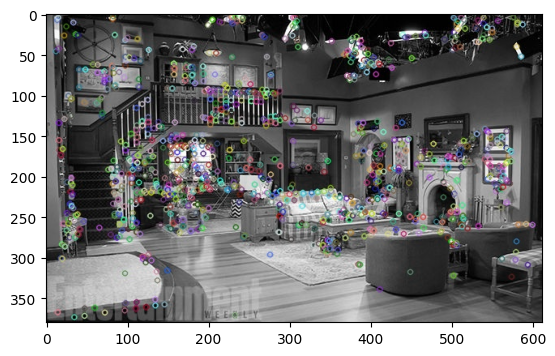

In [25]:
plt.imshow(img_with_keypoints)

## Experimenting with SURF (Speeded Up Robust Features)
The SURF Algorithm approximates the LoG algorithm with a simple Box Filter, thereby making things faster than SIFT
Whereas SIFT approximates the convolution of the normalized LoG over the image with DoG, SURF approximates it by calculating the determinant of the Hessian Matrix of the integral image colnvolved with a box filter. 

In [35]:
image_blurred_with_box_filter = cv.boxFilter(img_copy,ddepth = -1, ksize = (7,7))

### An example of colvolving the box filter over an image

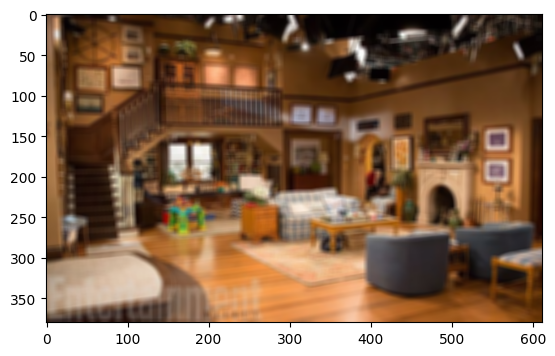

In [36]:
plt.imshow(cv.cvtColor(image_blurred_with_box_filter,cv.COLOR_BGR2RGB))

In [39]:
surf = cv.xfeatures2d.SURF_create(400)
kp, des2 = surf.detectAndCompute(image_blurred_with_box_filter,None)
img2 = cv.drawKeypoints(img,kp,None,(255,0,0),4)

'4.9.0'

## Using the Feature Descriptors to match features

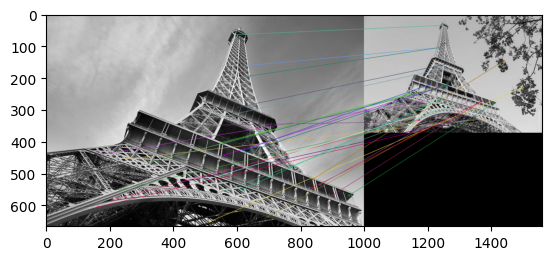

(<matplotlib.image.AxesImage at 0x1c883e189a0>, None)

In [41]:

query = cv.imread('./../query_img.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
key = cv.imread('./../key_img.jpg',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(query,None)
kp2, des2 = sift.detectAndCompute(key,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(query,kp1,key,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()